In [23]:
import nshutils

nshutils.pretty()

In [24]:
import pickle

with open("problematic_samples_jmpl.relaxdata.pkl", "rb") as f:
    data = pickle.load(f)

print(type(data), len(data))

<class 'list'> 111


In [25]:
data[0]["atoms"][0]

{'numbers': array[10] i64 x∈[6, 72] μ=21.800 σ=25.420 [72, 72, 6, 6, 7, 7, 7, 7, 17, 17],
 'positions': array[10, 3] n=30 x∈[0.031, 6.773] μ=2.624 σ=1.606,
 'cell': array[3, 3] n=9 x∈[-0.530, 7.339] μ=1.748 σ=2.749 [[3.582, 0., 2.193e-16], [8.594e-16, 5.344, -0.530], [0., 0., 7.339]],
 'pbc': array[3] bool x∈[True, True] μ=1.000 σ=0. [True, True, True]}

Error: 0.1327 True Formation Energy: -3.0579 Predicted Formation Energy: -2.9253


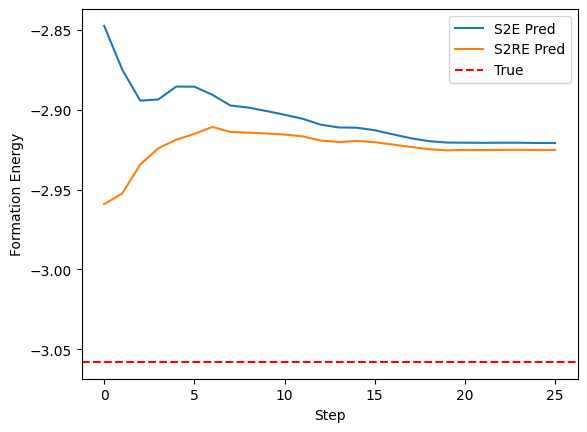

In [27]:
from typing import Any

import ase
import ase.visualize
import matplotlib.pyplot as plt
from IPython.display import display


def plot_energy_vs_steps(sample: dict[str, Any], ax: plt.Axes | None = None):
    e_form_true = sample["true_formation_energy"]

    if ax is None:
        _, ax = plt.subplots()
    ax.plot(sample["s2e_energies"], label="S2E Pred")
    ax.plot(sample["s2re_energies"], label="S2RE Pred")
    ax.axhline(y=e_form_true, color="r", linestyle="--", label="True")

    ax.set_xlabel("Step")
    ax.set_ylabel("Formation Energy")
    ax.legend()

    return ax


def plot_trajectory(sample: dict[str, Any]):
    print(
        f"Error: {sample['error']:0.4f}",
        f"True Formation Energy: {sample['true_formation_energy']:0.4f}",
        f"Predicted Formation Energy: {sample['s2re_energies'][-1]:0.4f}",
    )
    display(ase.visualize.view([ase.Atoms(**d) for d in sample["atoms"]], viewer="ngl"))


def plot_system(sample: dict[str, Any]):
    plot_trajectory(sample)
    plot_energy_vs_steps(sample)
    plt.show()


plot_system(data[14])